Notebook to investigate raw FinBERT predictions (excluding results of Granger Causality & OLS, see \notebooks\exploratory_analysis_regression_results.ipnyb)

In [1]:
import pandas as pd
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools
import datetime as dt
import sqlite3

# connect to folder for custom functions
root = Path.cwd().parent
vis_path = root / "src" / "visualizations" 
mod_path = root / "src" / "modelling" 
sys.path.append(str(vis_path))
sys.path.append(str(mod_path))

from read_articles import read
from plot_functions import plot_aini_series_subplots, plot_aini_hist_grid_by_years
from compute_extrema import compute_aini_extrema

In [2]:
# prepare paths
var_path = root / "data" / "processed" / "variables"
art_path = root / "data" / "processed" / "articles"
table_path = root / "reports" / "tables"
fig_path = root / "reports" / "figures"

# load aini data
aini_custom = pd.read_csv(var_path / "binary_AINI_variables.csv")
aini_w0 = pd.read_csv(var_path / "w0_AINI_variables.csv")
aini_w1 = pd.read_csv(var_path / "w1_AINI_variables.csv")
aini_w2 =  pd.read_csv(var_path / "w2_AINI_variables.csv")


In [3]:
# create dataframes for visualizaions
normalized_AINI = pd.DataFrame()

# ensure sorting
aini_w0 = aini_w0.sort_values("date")
aini_w1 = aini_w1.sort_values("date")
aini_w2 = aini_w2.sort_values("date")
aini_custom = aini_custom.sort_values("date")

# compute extrema
merged, tidy, pivot, extrema = compute_aini_extrema(aini_w0,aini_w1,aini_w2,aini_custom)
aini_w1

c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:87: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tidy.pivot_table(
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:98: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "date"])
c:\Users\PC\Desktop\Masterarbeit\AI_narrative_index\src\modelling\compute_extrema.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

,date,normalized_AINI,simple_AINI,EMA_02,EMA_08
0,2023-04-01,0.000000,0,0.000000,0.000000
1,2023-04-02,0.000000,0,0.000000,0.000000
2,2023-04-03,0.000000,0,0.000000,0.000000
3,2023-04-04,0.000000,0,0.000000,0.000000
4,2023-04-05,0.000000,0,0.000000,0.000000
...,...,...,...,...,...
776,2025-06-12,0.000000,0,0.035155,0.010033
777,2025-06-13,0.100000,3,0.048124,0.082007
778,2025-06-14,0.000000,0,0.038499,0.016401
779,2025-06-15,0.000000,0,0.030799,0.003280


Explore differences in min, max, mean and std. of AINI variables

In [4]:
def summarize_columns(df, exclude=["date"]):
    """Return mean, std, min, max for each numeric column in df (except exclude)."""
    results = []
    for col in df.columns:
        if col not in exclude:
            series = df[col]
            results.append({
                "variable": col,
                "mean": series.mean(),
                "std": series.std(),
                "min": series.min(),
                "max": series.max()
            })
    return pd.DataFrame(results)

# usage
stats_individual = summarize_columns(merged)
print(stats_individual)

                  variable      mean       std        min       max
0       normalized_AINI_w0 -0.000633  0.048172  -0.500000  0.200000
1           simple_AINI_w0  0.029525  1.176200  -5.000000  7.000000
2                EMA_02_w0 -0.000807  0.019148  -0.082879  0.058285
3                EMA_08_w0 -0.000645  0.039808  -0.382419  0.161401
4       normalized_AINI_w1 -0.004584  0.050987  -0.500000  0.181818
5           simple_AINI_w1 -0.073171  1.407303  -8.000000  8.000000
6                EMA_02_w1 -0.004736  0.023279  -0.109569  0.057163
7                EMA_08_w1 -0.004595  0.043196  -0.400197  0.145552
8       normalized_AINI_w2 -0.005800  0.051114  -0.500000  0.166667
9           simple_AINI_w2 -0.082157  1.339887  -7.000000  6.000000
10               EMA_02_w2 -0.005971  0.022267  -0.099367  0.061224
11               EMA_08_w2 -0.005807  0.042958  -0.400197  0.141730
12  normalized_AINI_custom -0.087624  0.074784  -0.500000  0.000000
13      simple_AINI_custom -2.486521  2.559475 -

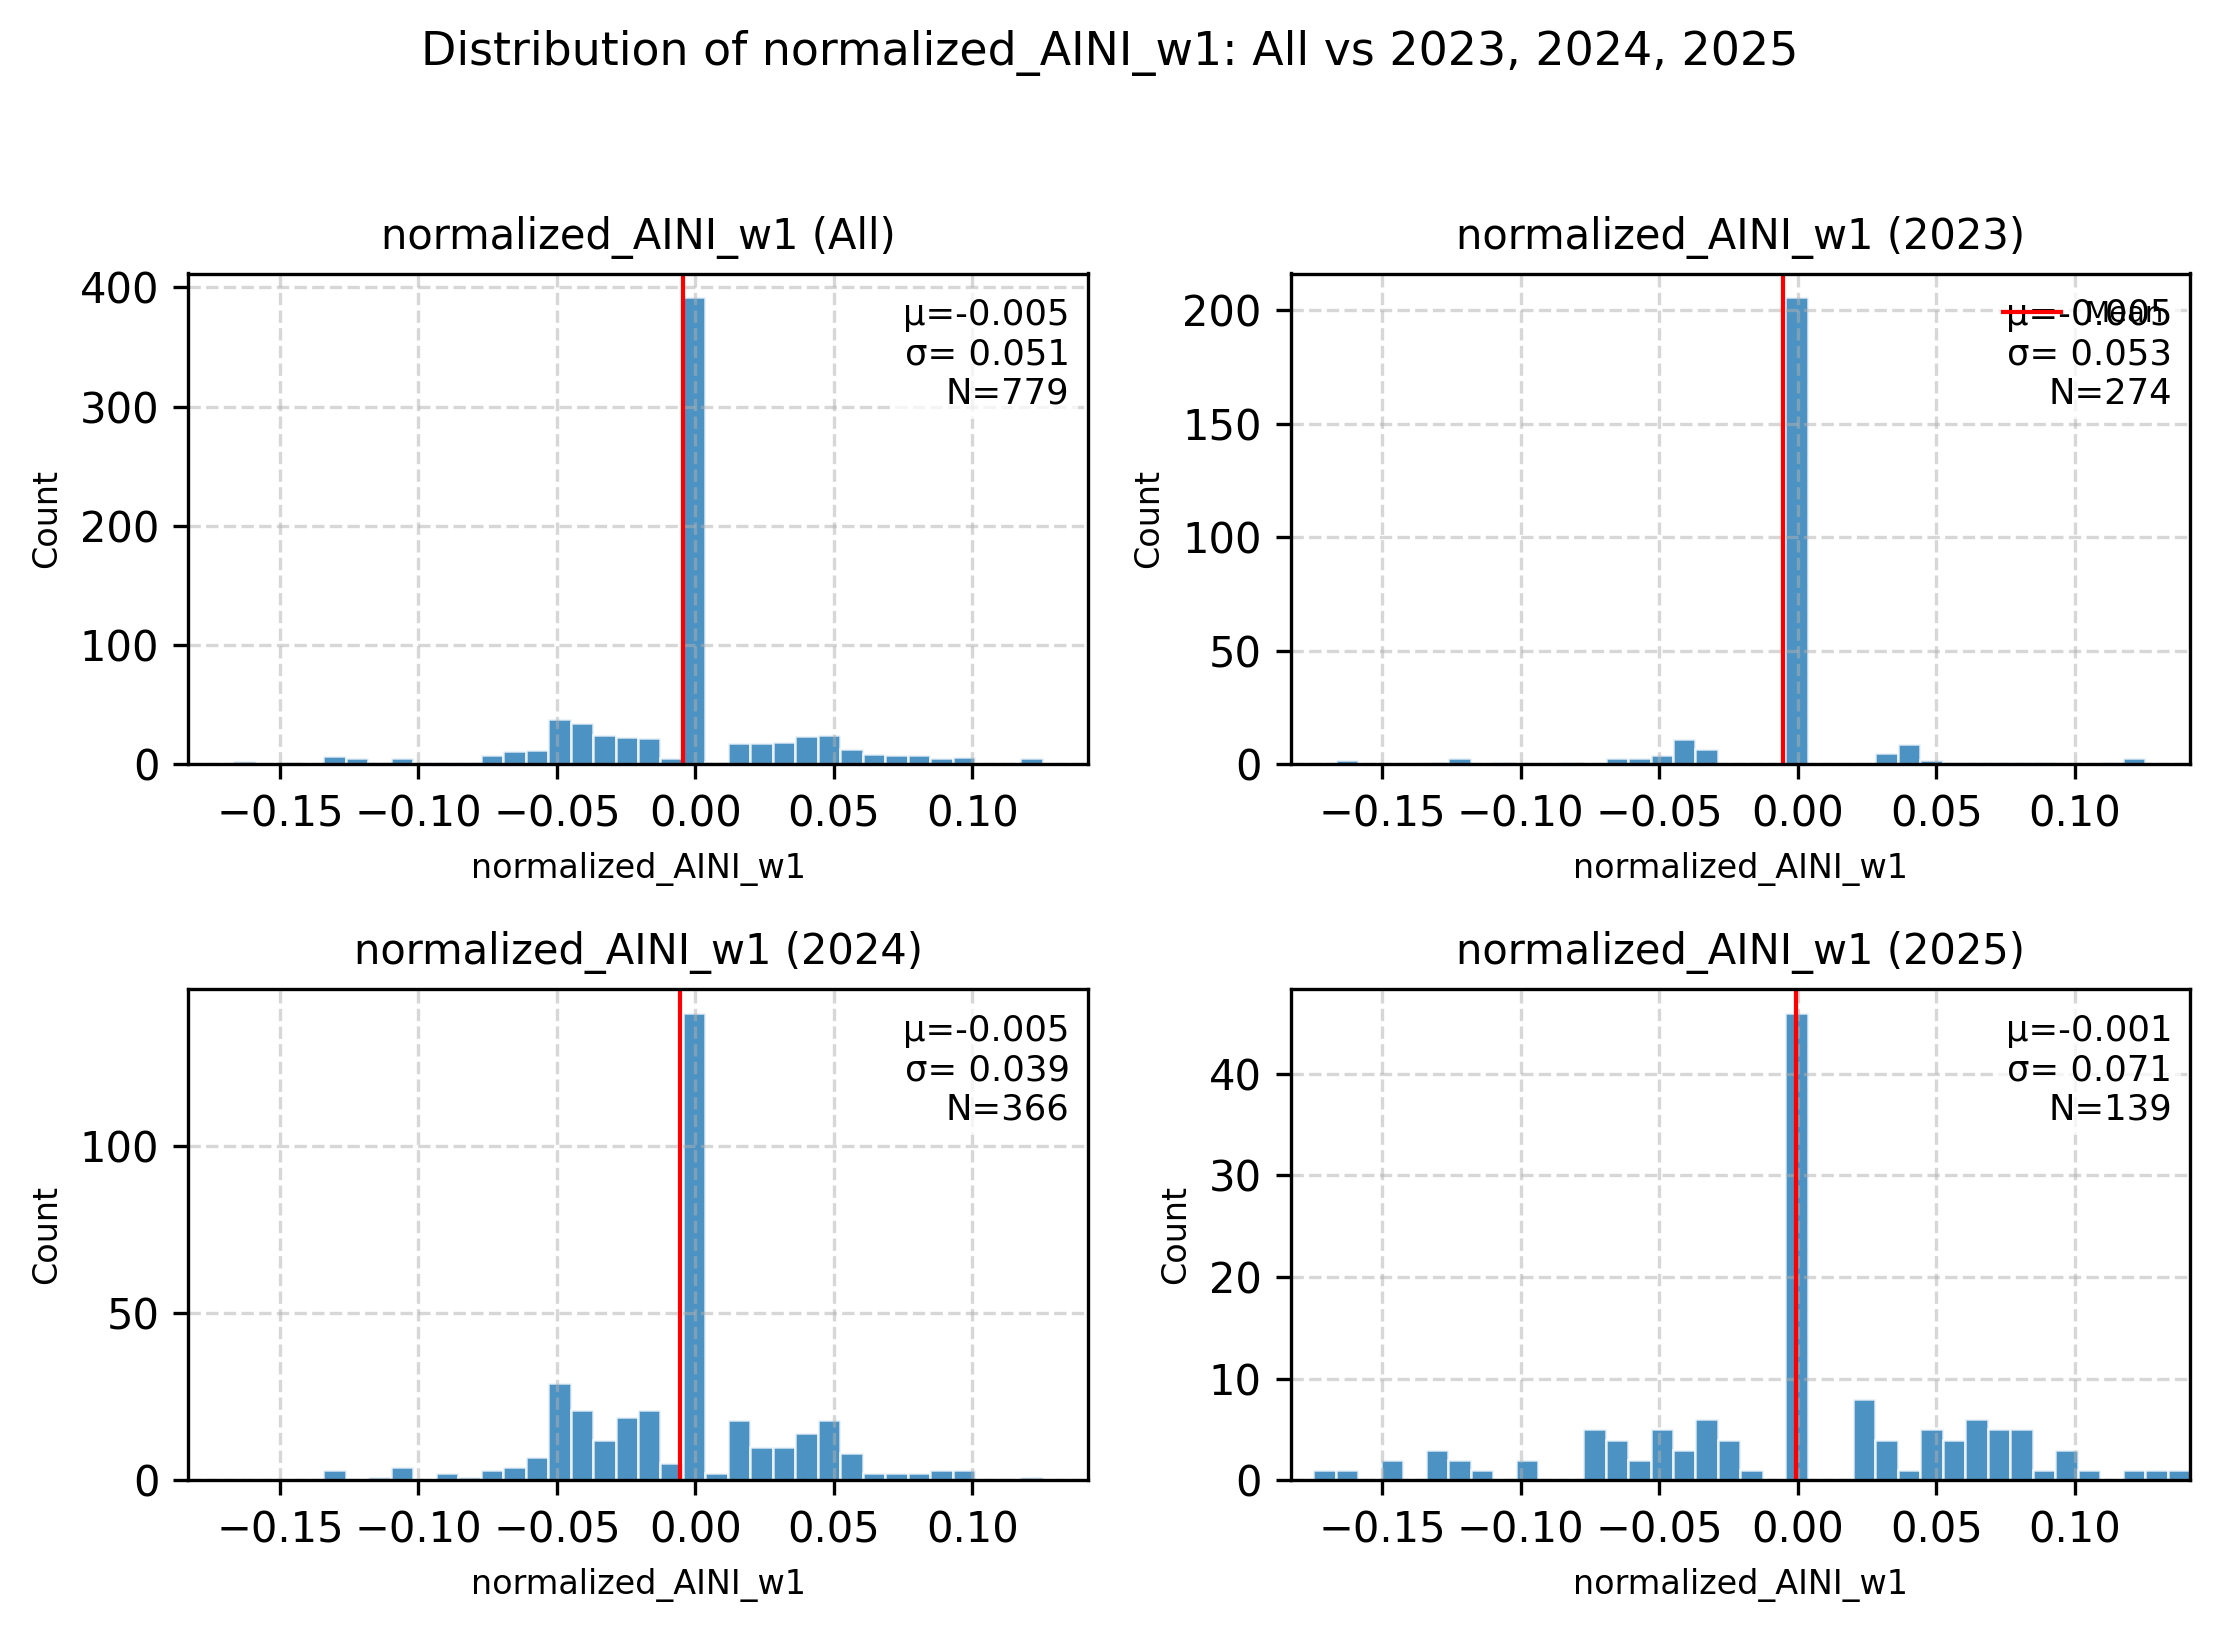

In [5]:
# plot distribution, ignoring raw counts due to unequal count of articles / day# 
outpath_hist = fig_path / "aini_hist_year_panels.png"

plot_aini_hist_grid_by_years(
    df = merged,
    outpath= outpath_hist
)


In [6]:
merged.columns


Index(['date', 'normalized_AINI_w0', 'simple_AINI_w0', 'EMA_02_w0',
       'EMA_08_w0', 'normalized_AINI_w1', 'simple_AINI_w1', 'EMA_02_w1',
       'EMA_08_w1', 'normalized_AINI_w2', 'simple_AINI_w2', 'EMA_02_w2',
       'EMA_08_w2', 'normalized_AINI_custom', 'simple_AINI_custom',
       'EMA_02_custom', 'EMA_08_custom'],
      dtype='object')

In [7]:
# write to csv
extrema.to_csv(table_path / "aini_extrema.csv")


In [8]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

Calculate weekly extrema (by calendar week)

In [9]:
# derive calendar week (ISO year + week number)
tidy["week"] = tidy["date"].dt.to_period("W").apply(lambda r: r.start_time)

# Count how often each min/max week occurs
counts_by_week = (
    tidy.groupby(["type", "week"])
        .size()
        .reset_index(name="count")
        .sort_values(["type", "count"], ascending=[True, False])
)

# subset n > 0
extrema_weekly = counts_by_week[counts_by_week["count"] > 0]

# collect variables for each week
week_dict = (
    tidy.groupby(["week"])["variable"]
    .apply(list)
    .to_dict()
)

# attach variables to each week
extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)

# bring into convenient format
extrema_weekly_clean = extrema_weekly.copy()

# week start (Monday)
week_start = extrema_weekly_clean["week"]
# week end (Sunday) = start + 6 days
week_end = week_start + pd.Timedelta(days=6)

# format as "dd.mm.yyyy - dd.mm.yyyy"
extrema_weekly_clean["week"] = (
    week_start.dt.strftime("%d.%m.%Y") + " - " + week_end.dt.strftime("%d.%m.%Y")
)

extrema_weekly_clean["type"] = extrema_weekly_clean["type"].replace({"min": "minimum", "max": "maximum"})
extrema_weekly_clean.rename(columns={"count": "n measures"}, inplace=True)

# save
extrema_weekly_clean.to_csv(table_path / "aini_weekly_extrema.csv", index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_21608\2630997574.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tidy.groupby(["type", "week"])
C:\Users\PC\AppData\Local\Temp\ipykernel_21608\2630997574.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extrema_weekly["measure"] = extrema_weekly["week"].map(week_dict)
C:\Users\PC\AppData\Local\Temp\ipykernel_21608\2630997574.py:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the

In [10]:
# Convert to LaTeX with booktabs, tabular (single-page), wrapped in adjustbox
latex_table = extrema_weekly_clean.to_latex(
    index=False,
    escape=True,
    column_format="l" + "c" * (len(extrema_weekly_clean.columns) - 1),
    bold_rows=False
)

# Add booktabs spacing
latex_table = latex_table.replace("\\toprule", "\\toprule\n\\addlinespace")
latex_table = latex_table.replace("\\midrule", "\\midrule\n\\addlinespace")
latex_table = latex_table.replace("\\bottomrule", "\\addlinespace\n\\bottomrule")

# Wrap in table + adjustbox
latex_wrapped = (
    "\\begin{table}[!htbp]\n"
    "\\centering\n"
    "\\begin{adjustbox}{width=\\textwidth}\n"
    + latex_table +
    "\\end{adjustbox}\n"
    "\\caption{AINI extrema}\n"
    "\\label{tab:aini_extrema}\n"
    "\\end{table}\n"
)

# Save to file
output_path = table_path / "aini_extrema_weekly.tex"
with open(output_path, "w") as f:
    f.write(latex_wrapped)

In [11]:
extrema_weekly_clean.sort_values("n measures",ascending=False)

,type,week,n measures,measure
1,minimum,10.07.2023 - 16.07.2023,10,"[normalized_AINI_w0, EMA_02_w0, EMA_08_w0, nor..."
11,maximum,27.03.2023 - 02.04.2023,4,"[normalized_AINI_custom, simple_AINI_custom, E..."
4,minimum,27.01.2025 - 02.02.2025,3,"[simple_AINI_w1, EMA_02_w1, simple_AINI_w2]"
20,maximum,02.06.2025 - 08.06.2025,3,"[normalized_AINI_w0, EMA_02_w0, EMA_08_w0]"
21,maximum,09.06.2025 - 15.06.2025,3,"[normalized_AINI_w1, EMA_08_w1, EMA_02_w2]"
5,minimum,03.02.2025 - 09.02.2025,2,"[simple_AINI_custom, EMA_02_custom]"
17,maximum,10.02.2025 - 16.02.2025,2,"[simple_AINI_w0, simple_AINI_w1]"
18,maximum,17.03.2025 - 23.03.2025,2,"[EMA_02_w1, EMA_08_w2]"
3,minimum,30.12.2024 - 05.01.2025,1,[simple_AINI_w0]
13,maximum,11.09.2023 - 17.09.2023,1,[normalized_AINI_w2]


load data with AINI predictions & compare corpora with maxima and minima

In [12]:
# load & merge w1 data custom finbert data
c_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_on_binary.csv")
c_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_on_binary.csv")
c_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_on_binary.csv")
c_df = pd.concat([c_df23,c_df24,c_df25]) 

# load & merge w0 data
w0_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_0.csv")
w0_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_0.csv")
w0_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_0.csv")
w0_df = pd.concat([w0_df23,w0_df24,w0_df25]) 

# load & merge w1 data
w1_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_1.csv")
w1_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_1.csv")
w1_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_1.csv")
w1_df = pd.concat([w1_df23,w1_df24,w1_df25]) 

# merge on normalized_aini_wo to identify relevant articles
w2_df23 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2023_windsize_2.csv")
w2_df24 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2024_windsize_2.csv")
w2_df25 = pd.read_csv(var_path / "FinBERT_AINI_prediction_2025_windsize_2.csv")
w2_df = pd.concat([w2_df23,w2_df24,w2_df25]) 

# create df list 
aini_dfs = [c_df,w0_df,w1_df,w2_df]


In [13]:
# verify integrity 
for df in aini_dfs:
    print(
        f"\nFirst entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\n# unique article_id: {df['article_id'].nunique()} " 
        f"\nMin article_id: {df['article_id'].min()} "
        f"\nMax article_id: {df['article_id'].max()} "
        f"\nColumns: {list(df.columns)}\n"
    )



First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 21886 
# non-unique article_id: 1898 
# unique article_id: 19988 
Min article_id: 1 
Max article_id: 37460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'ai_window', 'predicted_label', 'predicted_class', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
# unique article_id: 21006 
Min article_id: 1 
Max article_id: 37460 
Columns: ['article_id', 'image_src', 'scanned_time', 'title', 'sub_title', 'corpus', 'index_id', 'id', 'date', 'link', 'section', 'cleaned_corpus', 'text', 'ai_window', 'ai_relevant', 'sentiment_label', 'sentiment_score', 'hype_score']


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 2

In [14]:
# investigate duplicates in article ids
dups = w0_df[w0_df[["article_id", "title"]].duplicated(keep=False)].sort_values("article_id")
dups

,article_id,image_src,scanned_time,title,sub_title,corpus,index_id,id,date,link,section,cleaned_corpus,text,ai_window,ai_relevant,sentiment_label,sentiment_score,hype_score


In [15]:
# subset for relevant columns
rel_col = ["date","article_id","sentiment_label","hype_score"]
clean_df = []

for df in aini_dfs:
    df = df[rel_col].copy()
    clean_df.append(df)
    
# unpack supsetted dataframes containing Finbert AINI estimates    
c_df_sub,w0_df_sub,w1_df_sub,w2_df_sub = clean_df
w2_df_sub

,date,article_id,sentiment_label,hype_score
0,2023-01-10 00:00:00,36,neutral,0
1,2023-01-10 00:00:00,39,neutral,0
2,2023-01-12 00:00:00,87,neutral,0
3,2023-01-12 00:00:00,102,neutral,0
4,2023-01-13 00:00:00,111,neutral,0
...,...,...,...,...
4055,2025-06-16 00:00:00,4120,neutral,0
4056,2025-06-16 00:00:00,4121,neutral,0
4057,2025-06-16 00:00:00,4122,neutral,0
4058,2025-06-16 00:00:00,4123,neutral,0


In [16]:
# verify integrity 
for df in clean_df:
    print(
        f"First entry (date): {df['date'].min()} "
        f"\nLast entry (date): {df['date'].max()} "
        f"\n# entries: {len(df)} "
        f"\n# non-unique article_id: {df['article_id'].duplicated().sum()} "
        f"\nMin article_id: {df['article_id'].min()} "
        f"\nMax article_id: {df['article_id'].max()} "
        f"\nColumns: {list(df.columns)}\n"
    )


First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 21886 
# non-unique article_id: 1898 
Min article_id: 1 
Max article_id: 37460 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Min article_id: 1 
Max article_id: 37460 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Min article_id: 1 
Max article_id: 37460 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']

First entry (date): 2023-01-03 00:00:00 
Last entry (date): 2025-06-16 00:00:00 
# entries: 22904 
# non-unique article_id: 1898 
Min article_id: 1 
Max article_id: 37460 
Columns: ['date', 'article_id', 'sentiment_label', 'hype_score']



In [17]:
def summ(df, name):
    n = len(df)
    u = df['article_id'].nunique()
    dups = df['article_id'].duplicated().sum()
    print(f"{name:>3} rows={n:,}  unique_ids={u:,}  dup_ids={dups:,}")

summ(w0_df_sub, "w0")
summ(w1_df_sub, "w1")
summ(w2_df_sub, "w2")
summ(c_df_sub,  "c ")

ids = {
    "w0": set(w0_df_sub.article_id),
    "w1": set(w1_df_sub.article_id),
    "w2": set(w2_df_sub.article_id),
    "c" : set(c_df_sub.article_id),
}
union = set().union(*ids.values())
print("union unique ids:", len(union))
for k in ids:
    print(f"missing in {k}:", len(union - ids[k]))


 w0 rows=22,904  unique_ids=21,006  dup_ids=1,898
 w1 rows=22,904  unique_ids=21,006  dup_ids=1,898
 w2 rows=22,904  unique_ids=21,006  dup_ids=1,898
 c  rows=21,886  unique_ids=19,988  dup_ids=1,898
union unique ids: 21006
missing in w0: 0
missing in w1: 0
missing in w2: 0
missing in c: 1018


Combine AINI predictions to investigate minima & maxima

In [18]:
# harmonize ids
w0 = w0_df_sub.copy()
w1 = w1_df_sub.copy()
w2 = w2_df_sub.copy()
c  = c_df_sub.copy()

# bring to datetime, normalize to 00:00:00
for df in (w0, w1, w2, c):
    df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.normalize()

# drop dubplicates
w0 = w0.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
w1 = w1.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
w2 = w2.sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")
c  = c .sort_values(["article_id", "date"]).drop_duplicates("article_id", keep="last")

# left join
complete_left = w0.copy()
complete_left = complete_left.merge(
    w1, on="article_id", how="left", suffixes=("", "_w1"), validate="one_to_one"
)
complete_left = complete_left.merge(
    w2, on="article_id", how="left", suffixes=("", "_w2"), validate="one_to_one"
)
complete_left = complete_left.merge(
    c,  on="article_id", how="left", suffixes=("", "_c"),  validate="one_to_one"
)

# control: outer join
complete_outer = w0.merge(
    w1, on="article_id", how="outer", suffixes=("", "_w1"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    w2, on="article_id", how="outer", suffixes=("", "_w2"), validate="one_to_one"
)
complete_outer = complete_outer.merge(
    c,  on="article_id", how="outer", suffixes=("", "_c"),  validate="one_to_one"
)


# compare joins
print("[LEFT] n observations:", len(complete_left))
print("[OUTER] n observations:", len(complete_outer))

[LEFT] n observations: 21006
[OUTER] n observations: 21006


In [19]:
# columns to bring over from w1_df
keep = ["article_id", "title", "sub_title","section", "cleaned_corpus", "date"]

# subset + clean IDs on the right side
for_texts = w1_df.loc[:, keep].copy()
for_texts["article_id"] = (
    for_texts["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)  # zero-width + BOM
    .str.strip()
)

# ensure right side has unique keys for a clean one-to-one merge
# (keep the first occurrence; adjust if you prefer 'last')
for_texts = for_texts.drop_duplicates(subset="article_id", keep="first")

# clean IDs on the left side too (same normalization)
complete_left = complete_left.copy()
complete_left["article_id"] = (
    complete_left["article_id"]
    .astype(str)
    .str.replace(r"[\u200b\u200c\u200d\ufeff]", "", regex=True)
    .str.strip()
)

# merge (left join), bring in *_t suffix to avoid column collisions
complete_df = complete_left.merge(
    for_texts,
    how="left",
    on="article_id",
    suffixes=("", "_t"),
    validate="one_to_one",  # will raise if either side still has duplicate keys
)

print("[COMPLETE] n observations:", len(complete_df))
complete_df

[COMPLETE] n observations: 21006


,date,article_id,sentiment_label,hype_score,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t
0,2025-01-01,1,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,One Dead After Cybertruck Explodes Outside Tru...,Tesla vehicle rented in Colorado contained gas...,us-news,U.S. Tesla vehicle rented in. Colorado contain...,2025-01-01 00:00:00
1,2025-01-01,2,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,The Levi Strauss Heir Elected to Save San Fran...,A mayor-elect with ties to the tech sector but...,us-news,U.S. A mayor-elect with ties to the tech secto...,2025-01-01 00:00:00
2,2025-01-01,3,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Alibaba to Sell Stake in Chinese Hypermarket O...,The company will sell its entire 78.7% stake i...,business,"Jan. 1, 658 pm. ET 1 min. The e-commerce giant...",2025-01-01 00:00:00
3,2025-01-01,4,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Green Electricity Costs a Bundle,The data make clear: The notion that solar and...,opinion,The data make clear. The notion that solar and...,2025-01-01 00:00:00
4,2025-01-01,5,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0,2025-01-01,neutral,0.0,Ron Johnson: Fiscal Sanity Isn’t Too Much to H...,Congress should revert to pre-pandemic spendin...,opinion,"Jan. 1, 531 pm. ET 341 3 min. Journal. Editori...",2025-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21001,2024-08-27,37453,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0.0,"Leonard Riggio, Who Built Barnes & Noble Into ...","A seminal figure in the industry, he transform...",business,"Leonard. Riggio,. Who. Built. Barnes. Noble. I...",2024-08-27 00:00:00
21002,2024-08-27,37457,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0,2024-08-27,neutral,0.0,Kamala Harris’s Tax Increases and Cuts Take Shape,"Taxes would go up for high-income households, ...",politics,Kamala. Harris's. Tax. Increases and. Cuts. Ta...,2024-08-27 00:00:00
21003,2024-11-09,37458,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0.0,"With Arizona and Nevada Calls for Trump, Full ...",Republican president-elect wins 312 Electoral ...,politics,"With. Arizona and. Nevada. Calls for. Trump,. ...",2024-11-09 00:00:00
21004,2024-11-09,37459,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0,2024-11-09,neutral,0.0,Deals and Deterrence: Trump’s Foreign Policy i...,The president-elect is expected to showcase U....,politics,Deals and. Deterrence. Trump's. Foreign. Polic...,2024-11-09 00:00:00


In [20]:
extrema.sort_values("n measures",ascending=False).to_csv(var_path/ "extrema.csv")

In [21]:
# define minima
min_1 = pd.Timestamp("2025-02-05") # n=7
min_2a = pd.Timestamp("2025-07-15") # n=2
min_2b = pd.Timestamp("2025-02-04") # n=2

# define maxima, 
max_1 = pd.Timestamp("2023-04-01") # n=4
max_2a = pd.Timestamp("2025-02-13")  # n=3
max_2b = pd.Timestamp("2025-09-14")  # n=3
max_2c = pd.Timestamp("2025-06-21")  # n=3

# subset original data extrema, minima
articles_min1 = complete_df[complete_df["date"] == min_1] 
articles_min2a = complete_df[complete_df["date"] == min_2a]
articles_min2b = complete_df[complete_df["date"] == min_2b]

# subset original data extrema, maxmima
articles_max1 = complete_df[complete_df["date"] == max_1] 
articles_max2a = complete_df[complete_df["date"] == max_2a] 
articles_max2b = complete_df[complete_df["date"] == max_2b] 
articles_max2c = complete_df[complete_df["date"] == max_2c] 

# investigate structure
articles_min1

,date,article_id,sentiment_label,hype_score,date_w1,sentiment_label_w1,hype_score_w1,date_w2,sentiment_label_w2,hype_score_w2,date_c,sentiment_label_c,hype_score_c,title,sub_title,section,cleaned_corpus,date_t
992,2025-02-05,1004,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,negative,-1.0,How Far Is China’s Slowdown Spreading? Ask a D...,Weak demand among Chinese consumers for milk i...,economy,How. Far. Is. China's. Slowdown. Spreading? As...,2023-10-24 00:00:00
993,2025-02-05,1005,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,Georgia’s Six-Week Abortion Ban Upheld,State supreme court says law is valid even tho...,us-news,U.S. Georgia's. Six-Week. Abortion. Ban. Uphel...,2023-10-24 00:00:00
994,2025-02-05,1006,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,Michael Cohen Testifies Trump Ordered Him to I...,Former president and his fixer-turned-foe come...,politics,Former president and his fixer-turned-foe come...,2023-10-24 00:00:00
995,2025-02-05,1007,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,Biden’s Red-Line Moment With Iran,Blinken promises a swift and decisive response...,opinion,"REVIEW. OUTLOOK. Oct. 24, 621 pm. ET 3 min. Se...",2023-10-24 00:00:00
996,2025-02-05,1008,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,A Hamas Hostage’s Work in Africa,Shoshan Haran launched Fair Planet to help far...,opinion,"REVIEW. OUTLOOK. Oct. 24, 618 pm. ET 36 2 min....",2023-10-24 00:00:00
997,2025-02-05,1009,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,The Trumpian Tragedy of Jenna Ellis,Trump’s stolen election claims keep hurting ev...,opinion,REVIEW. OUTLOOK. Trump's stolen election claim...,2023-10-24 00:00:00
998,2025-02-05,1010,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0.0,Plea Deals With Trump’s Lawyers to Shape Georg...,"‘I failed to do my due diligence,’ says the fo...",us-news,U.S. Plea. Deals. With. Trump's. Lawyers to. S...,2023-10-24 00:00:00
999,2025-02-05,1011,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,negative,-1.0,Hollywood’s A-List Bribe for Peace,George Clooney and friends offer big bucks to ...,opinion,390 5 min. SAG-Aftra. President. Fran. Dresche...,2023-10-24 00:00:00
1000,2025-02-05,1012,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,negative,-1.0,Trump Files New Arguments for Dismissal of Ele...,Former president’s lawyers say indictment viol...,politics,"4 min. Donald. Trump, who is accused of conspi...",2023-10-24 00:00:00
1001,2025-02-05,1013,neutral,0,2025-02-05,neutral,0,2025-02-05,neutral,0,2025-02-05,negative,-1.0,"Roe v. Wade Is Gone, but Abortions Are on the ...",New abortion bans have done little to reduce f...,us-news,"U.S. Oct. 24, 1000 am. ET 7 min. Change from. ...",2023-10-24 00:00:00


Ensure article count does not bias AINI

In [22]:
# Ensure both are datetime 
merged["date"] = pd.to_datetime(merged["date"]).dt.normalize()
n_per_day = (complete_df[["article_id", "date"]]
             .assign(date=lambda df: pd.to_datetime(df["date"]).dt.normalize())
             .groupby("date")
             .count()
             .rename(columns={"article_id": "n_articles"}))  

# merge
aini_article_count = merged.merge(
    n_per_day,
    on="date",
    how="left"
)

# calculate correlation between n articles & AINI variables
for col in aini_article_count.columns:
    if col not in ["date", "n_articles"]:
        corr = aini_article_count["n_articles"].corr(aini_article_count[col])
        print(f"{col}: {corr:.3f}")


normalized_AINI_w0: 0.038
simple_AINI_w0: 0.060
EMA_02_w0: 0.055
EMA_08_w0: 0.044
normalized_AINI_w1: 0.045
simple_AINI_w1: 0.011
EMA_02_w1: 0.040
EMA_08_w1: 0.047
normalized_AINI_w2: 0.081
simple_AINI_w2: 0.055
EMA_02_w2: 0.104
EMA_08_w2: 0.089
normalized_AINI_custom: -0.049
simple_AINI_custom: -0.660
EMA_02_custom: -0.205
EMA_08_custom: -0.065


Manually investiagte Minima & Maxima

In [23]:
read(articles_min1)

Extracting AI keyword context windows: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


Title   : GOP Picks Mike Johnson as House Speaker Nominee After Tom Emmer Stumbles
Date    : 2025-02-05 00:00:00
Section : politics
Scores  : hype_score=-1, hype_score_w1=-1, hype_score_w2=-1
--------------------------------------------------------------------------------

Article 1 of 1
Stopping reader.


In [24]:
# drop noisy estimates
merged_clean = merged[articles_min1] # too low samplesize + extrema
merged_clean

,date,normalized_AINI_w0,simple_AINI_w0,EMA_02_w0,EMA_08_w0,normalized_AINI_w1,simple_AINI_w1,EMA_02_w1,EMA_08_w1,normalized_AINI_w2,simple_AINI_w2,EMA_02_w2,EMA_08_w2,normalized_AINI_custom,simple_AINI_custom,EMA_02_custom,EMA_08_custom
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# investigate min 1
read(merged[merged["date"] == min_1])

ValueError: Missing column(s): ['title', 'section', 'cleaned_corpus']

In [ ]:
# investigate 01.04.2023; max 2 according to normalized_AINI_custom, simple_AINI_custom, EMA_02_custom, EMA_08_custom
articles_max1

In [ ]:
# drop noisy estimates
merged_clean = merged[merged["date"] != min_1]

# ensure datetime type
complete_df["date"] = pd.to_datetime(complete_df["date"], errors="coerce")

# subsets per year
df_2023 = complete_df[complete_df["date"].dt.year == 2023]
df_2024 = complete_df[complete_df["date"].dt.year == 2024]
df_2025 = complete_df[complete_df["date"].dt.year == 2025]

merged_clean
merged_clean["normalized_AINI_w2"].min()

Investigate AINI by year

In [ ]:
plot_aini_series_subplots(merged_clean)